In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

import tensorflow as tf

import gpflow
from gpflow.utilities import read_values, multiple_assign, set_trainable
from gpflow.inducing_variables import InducingPoints
import gpmaniflow
from gpmaniflow.models.SVGP import SVGP

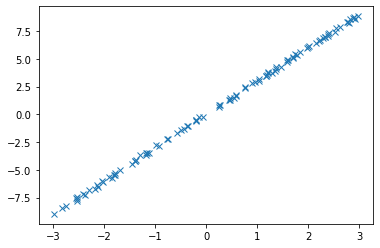

In [2]:
pX = np.linspace(-5.0, 5.0, 300)[:, None]
X = np.random.uniform(-3, 3, 100)[:, None]
Y = 3 * X + np.random.randn(*X.shape) * 0.1
Z = np.linspace(-5, 5, 50)[:, None]

train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))
train_dataset = train_dataset.shuffle(1024).batch(len(X))

plt.plot(X,Y ,"x")

In [3]:
kernel = gpflow.kernels.SquaredExponential()

model = SVGP(kernel, likelihood = gpflow.likelihoods.Gaussian(), inducing_variable=InducingPoints(Z.copy()))

train_iter = iter(train_dataset.repeat())
training_loss = model.training_loss_closure(train_iter, compile=True)
optimizer = tf.keras.optimizers.Adam(0.01)
@tf.function
def optimization_step():
    optimizer.minimize(training_loss, model.trainable_variables)
elbo_hist = []
for step in range(2000):
    optimization_step()
    if step % 50 == 0:
        minibatch_elbo = -training_loss().numpy()
        print('Step: %s, Mini batch elbo: %s' % (step, minibatch_elbo))
        elbo_hist.append(minibatch_elbo)

ELBO = model.elbo((X,Y))

Step: 0, Mini batch elbo: -1548.8696612651024
Step: 50, Mini batch elbo: -610.1163076713049
Step: 100, Mini batch elbo: -221.55811807843702
Step: 150, Mini batch elbo: -163.98665715787303
Step: 200, Mini batch elbo: -152.40456255530896
Step: 250, Mini batch elbo: -148.5939157798329
Step: 300, Mini batch elbo: -146.18009587100164
Step: 350, Mini batch elbo: -143.99234082909527
Step: 400, Mini batch elbo: -141.69597836494515
Step: 450, Mini batch elbo: -139.2833517142731
Step: 500, Mini batch elbo: -136.7058876745375
Step: 550, Mini batch elbo: -133.9270699461182
Step: 600, Mini batch elbo: -130.92224626067815
Step: 650, Mini batch elbo: -127.68218182442705
Step: 700, Mini batch elbo: -124.21998639153013
Step: 750, Mini batch elbo: -120.42018853285816
Step: 800, Mini batch elbo: -116.24167735589509
Step: 850, Mini batch elbo: -111.83158038239506
Step: 900, Mini batch elbo: -106.94444796753321
Step: 950, Mini batch elbo: -101.66237899504122
Step: 1000, Mini batch elbo: -96.14329957752761


In [4]:
import gpmaniflow.samplers
from gpmaniflow.samplers import initialize_sampler

In [5]:
model.MatheronSampler = initialize_sampler()

I'm here


In [6]:
out1 = model.MatheronSampler(pX)
model.MatheronSampler = initialize_sampler()
out2 = model.MatheronSampler(pX)
out3 = model.MatheronSampler(pX)
out2 - out3

I'm here


<tf.Tensor: shape=(1, 300, 1), dtype=float64, numpy=
array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [

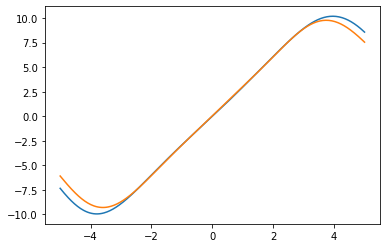

In [7]:
plt.plot(pX, out1[0,:,0])
plt.plot(pX, out2[0,:,0])

In [8]:
model.MatheronSampler = initialize_sampler(from_df = True)

I'm here
(50, 50)


(1, 1, 300, 1)
(300, 50)
tf.Tensor(
[[ 4.67630860e-01  5.57642959e-01  6.39536366e-01 ...  2.31722746e-07
   6.06132415e-09  2.37614484e-08]
 [ 4.10171941e-01  5.01082118e-01  5.83951936e-01 ...  2.60235621e-07
   6.88941642e-09  2.68901886e-08]
 [ 3.52232372e-01  4.43936006e-01  5.27687904e-01 ...  2.92138862e-07
   7.82749298e-09  3.04186436e-08]
 ...
 [-1.26631860e-06 -1.50743087e-06 -1.76982722e-06 ...  4.13501571e-01
   1.67565941e+00  1.35206474e+00]
 [-1.13397849e-06 -1.35076067e-06 -1.58683017e-06 ...  3.55587922e-01
   1.65361845e+00  1.31315313e+00]
 [-1.01505770e-06 -1.20988317e-06 -1.42217815e-06 ...  2.97256913e-01
   1.62995543e+00  1.27281967e+00]], shape=(300, 50), dtype=float64)
tf.Tensor(
[[[[-3.19679502]
   [-3.15578358]
   [-3.11173033]
   [-3.06466722]
   [-3.01463271]
   [-2.96167166]
   [-2.90583527]
   [-2.84718085]
   [-2.78577177]
   [-2.7216772 ]
   [-2.65497194]
   [-2.58573621]
   [-2.51405541]
   [-2.44001982]
   [-2.36372439]
   [-2.28526838]
   [-2.20475

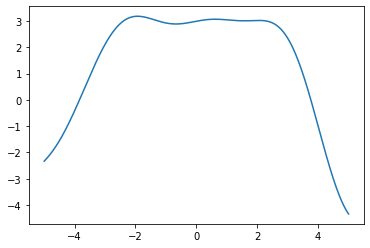

In [9]:
dout = model.MatheronSampler(pX)
plt.plot(pX, dout[0,:,0])

# 2-dimensional input

In [10]:
pX = np.reshape(np.random.uniform(-2, 2, 200*2), [200, 2])
X = np.random.uniform(-3, 3, 200*2)[:, None]
X = np.reshape(X, [200, 2])
Y = 2 * X[:,0] + 1 * X[:,1] + np.random.randn(200) * 0.1
Y = np.reshape(Y, [200,1])
Z = np.random.uniform(-3, 3, 100*2)[:, None]
Z = np.reshape(Z, [100, 2])

train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))
train_dataset = train_dataset.shuffle(1024).batch(len(X))

print(Y.shape)
#plt.plot(X,Y ,"x")

(200, 1)


In [11]:
kernel = gpflow.kernels.SquaredExponential()

model = SVGP(kernel, likelihood = gpflow.likelihoods.Gaussian(), inducing_variable=InducingPoints(Z.copy()))

train_iter = iter(train_dataset.repeat())
training_loss = model.training_loss_closure(train_iter, compile=True)
optimizer = tf.keras.optimizers.Adam(0.01)
@tf.function
def optimization_step():
    optimizer.minimize(training_loss, model.trainable_variables)
elbo_hist = []
for step in range(3000):
    optimization_step()
    if step % 50 == 0:
        minibatch_elbo = -training_loss().numpy()
        print('Step: %s, Mini batch elbo: %s' % (step, minibatch_elbo))
        elbo_hist.append(minibatch_elbo)

ELBO = model.elbo((X,Y))

Step: 0, Mini batch elbo: -1796.8887465954122
Step: 50, Mini batch elbo: -824.724582367459
Step: 100, Mini batch elbo: -398.6238410895571
Step: 150, Mini batch elbo: -328.5340592320227
Step: 200, Mini batch elbo: -308.82102484182394
Step: 250, Mini batch elbo: -295.011508377313
Step: 300, Mini batch elbo: -283.1180635222359
Step: 350, Mini batch elbo: -271.2469478745685
Step: 400, Mini batch elbo: -260.6044604884216
Step: 450, Mini batch elbo: -250.7958536173996
Step: 500, Mini batch elbo: -239.1766539353779
Step: 550, Mini batch elbo: -227.51892700319135
Step: 600, Mini batch elbo: -214.85117430329905
Step: 650, Mini batch elbo: -200.832365801092
Step: 700, Mini batch elbo: -184.94274334730648
Step: 750, Mini batch elbo: -167.99631554776317
Step: 800, Mini batch elbo: -152.0076737010865
Step: 850, Mini batch elbo: -128.6043414450528
Step: 900, Mini batch elbo: -112.85626268749769
Step: 950, Mini batch elbo: -82.77451786841041
Step: 1000, Mini batch elbo: -58.17900183236403
Step: 1050,

In [12]:
model.MatheronSampler = initialize_sampler(from_df = True)

I'm here
(100, 100)


(1, 1, 200, 2)
(400, 100)
tf.Tensor(
[[-0.71315818 -0.21102551 -0.10594893 ...  0.53928747 -0.68940673
   0.75432505]
 [ 0.69696867  0.53534169 -0.22343329 ... -0.53560365 -0.75168367
  -0.35511867]
 [-0.61614125 -0.36171441 -0.30499162 ...  0.39344877 -0.84562196
   0.63481306]
 ...
 [ 0.70623034  0.89547277  0.32388294 ... -0.05052482 -0.45991513
   0.11732541]
 [-0.40607934  0.09284783  0.23027126 ...  0.81835376 -0.6256343
   0.93570898]
 [ 0.79585531  0.95963739  0.46046168 ...  0.08477487 -0.39018027
   0.21752324]], shape=(400, 100), dtype=float64)
tf.Tensor(
[[[[2.40596888]
   [0.83635386]
   [1.80890645]
   [0.91338842]
   [1.86260603]
   [1.51726224]
   [1.90934012]
   [0.77450651]
   [1.33397856]
   [0.81740483]
   [1.7436573 ]
   [1.55444451]
   [1.00161134]
   [1.05136589]
   [1.90567026]
   [0.61176653]
   [1.0631571 ]
   [1.08747584]
   [1.65838042]
   [1.57941575]
   [1.73406838]
   [0.8263536 ]
   [2.65098789]
   [0.79255108]
   [3.26096761]
   [0.2859914 ]
   [1.51988

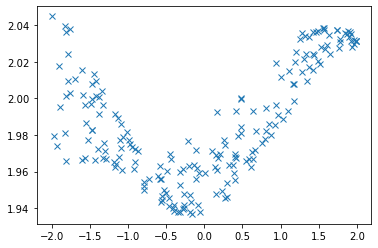

In [13]:
dout = model.MatheronSampler(pX)
dout.shape
plt.plot(pX[:,0], dout[0,:,0], 'x')
#plt.plot(pX[:,0], dout[0,:,0,0])
# Verify results of this matheron

In [14]:
from gpmaniflow.curves import BezierCurve